## Masked Autoencoders: Visualization Demo

This is a visualization demo using our pre-trained MAE models. No GPU is needed.

### Prepare
Check environment. Install packages if in Colab.


In [1]:
import sys
import os
import requests

import torch
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image

# check whether run in Colab
os.chdir('/home/aarjav/scratch/mae')
import models_mae

### Define utils

In [29]:
# define the utils

imagenet_mean = np.array([0.485, 0.456, 0.406])
imagenet_std = np.array([0.229, 0.224, 0.225])

def show_image(image, title=''):
    # image is [H, W, 3]
    assert image.shape[2] == 3
    plt.imshow(torch.clip((image * imagenet_std + imagenet_mean) * 255, 0, 255).int())
    plt.title(title, fontsize=16)
    plt.axis('off')
    return

def prepare_model(chkpt_dir, arch='mae_vit_large_patch16'):
    # build model
    model = getattr(models_mae, arch)()
    # load model
    checkpoint = torch.load(chkpt_dir, map_location='cpu')
    msg = model.load_state_dict(checkpoint['model'], strict=False)
    print(msg)
    return model

def run_one_image(img, model_1, model_2, model_3, model_4):
    x = torch.tensor(img)

    # make it a batch-like
    x = x.unsqueeze(dim=0)
    x = torch.einsum('nhwc->nchw', x)

    # run MAE
    loss, y_1, mask_1 = model_1(x.float(), mask_ratio=0.75)
    y_1 = model_1.unpatchify(y_1)
    y_1 = torch.einsum('nchw->nhwc', y_1).detach().cpu()

    # visualize the mask_1
    mask_1 = mask_1.detach()
    mask_1 = mask_1.unsqueeze(-1).repeat(1, 1, model_1.patch_embed.patch_size[0]**2 *3)  # (N, H*W, p*p*3)
    mask_1 = model_1.unpatchify(mask_1)  # 1 is removing, 0 is keeping
    mask_1 = torch.einsum('nchw->nhwc', mask_1).detach().cpu()
    
    x = torch.einsum('nchw->nhwc', x)

    # masked image
    im_masked_1 = x * (1 - mask_1)

    # MAE reconstruction pasted with visible patches
    im_paste_1 = x * (1 - mask_1) + y_1 * mask_1
    
    x = torch.tensor(img)
    # make it a batch-like
    x = x.unsqueeze(dim=0)
    x = torch.einsum('nhwc->nchw', x)
    
    loss, y_2, mask_2 = model_2(x.float(), mask_ratio=0.75)
    y_2 = model_2.unpatchify(y_2)
    y_2 = torch.einsum('nchw->nhwc', y_2).detach().cpu()

    # visualize the mask_2
    mask_2 = mask_2.detach()
    mask_2 = mask_2.unsqueeze(-1).repeat(1, 1, model_2.patch_embed.patch_size[0]**2 *3)  # (N, H*W, p*p*3)
    mask_2 = model_2.unpatchify(mask_2)  # 1 is removing, 0 is keeping
    mask_2 = torch.einsum('nchw->nhwc', mask_2).detach().cpu()
    
    x = torch.einsum('nchw->nhwc', x)
    

    # masked image
    im_masked_2 = x * (1 - mask_2)

    # MAE reconstruction pasted with visible patches
    im_paste_2 = x * (1 - mask_2) + y_2 * mask_2
    
    x = torch.tensor(img)

    # make it a batch-like
    x = x.unsqueeze(dim=0)
    x = torch.einsum('nhwc->nchw', x)
    
    loss, y_3, mask_3 = model_3(x.float(), mask_ratio=0.75)
    y_3 = model_3.unpatchify(y_3)
    y_3 = torch.einsum('nchw->nhwc', y_3).detach().cpu()

    # visualize the mask_3
    mask_3 = mask_3.detach()
    mask_3 = mask_3.unsqueeze(-1).repeat(1, 1, model_3.patch_embed.patch_size[0]**2 *3)  # (N, H*W, p*p*3)
    mask_3 = model_3.unpatchify(mask_3)  # 1 is removing, 0 is keeping
    mask_3 = torch.einsum('nchw->nhwc', mask_3).detach().cpu()
    
    x = torch.einsum('nchw->nhwc', x)

    # masked image
    im_masked_3 = x * (1 - mask_3)

    # MAE reconstruction pasted with visible patches
    im_paste_3 = x * (1 - mask_3) + y_3 * mask_3
    
    x = torch.tensor(img)

    # make it a batch-like
    x = x.unsqueeze(dim=0)
    x = torch.einsum('nhwc->nchw', x)
    
    loss, y_4, mask_4 = model_4(x.float(), mask_ratio=0.75)
    y_4 = model_4.unpatchify(y_4)
    y_4 = torch.einsum('nchw->nhwc', y_4).detach().cpu()

    # visualize the mask_4
    mask_4 = mask_4.detach()
    mask_4 = mask_4.unsqueeze(-1).repeat(1, 1, model_4.patch_embed.patch_size[0]**2 *3)  # (N, H*W, p*p*3)
    mask_4 = model_4.unpatchify(mask_4)  # 1 is removing, 0 is keeping
    mask_4 = torch.einsum('nchw->nhwc', mask_4).detach().cpu()
    
    x = torch.einsum('nchw->nhwc', x)

    # masked image
    im_masked_4 = x * (1 - mask_4)

    # MAE reconstruction pasted with visible patches
    im_paste_4 = x * (1 - mask_4) + y_4 * mask_4


    # x = torch.tensor(img)

    # # make it a batch-like
    # x = x.unsqueeze(dim=0)
    # x = torch.einsum('nhwc->nchw', x)
    
    # loss, y_5, mask_5 = model_5(x.float(), mask_ratio=0.75)
    # y_5 = model_5.unpatchify(y_5)
    # y_5 = torch.einsum('nchw->nhwc', y_5).detach().cpu()

    # # visualize the mask_5
    # mask_5 = mask_5.detach()
    # mask_5 = mask_5.unsqueeze(-1).repeat(1, 1, model_5.patch_embed.patch_size[0]**2 *3)  # (N, H*W, p*p*5)
    # mask_5 = model_5.unpatchify(mask_5)  # 1 is removing, 0 is keeping
    # mask_5 = torch.einsum('nchw->nhwc', mask_5).detach().cpu()
    
    # x = torch.einsum('nchw->nhwc', x)

    # # masked image
    # im_masked_5 = x * (1 - mask_5)

    # # MAE reconstruction pasted with visible patches
    # im_paste_5 = x * (1 - mask_5) + y_5 * mask_5
    
    # x = torch.tensor(img)

    # # make it a batch-like
    # x = x.unsqueeze(dim=0)
    # x = torch.einsum('nhwc->nchw', x)
    
    # loss, y_6, mask_6 = model_6(x.float(), mask_ratio=0.75)
    # y_6 = model_6.unpatchify(y_6)
    # y_6 = torch.einsum('nchw->nhwc', y_6).detach().cpu()

    # # visualize the mask_6
    # mask_6 = mask_6.detach()
    # mask_6 = mask_6.unsqueeze(-1).repeat(1, 1, model_6.patch_embed.patch_size[0]**2 *3)  # (N, H*W, p*p*6)
    # mask_6 = model_6.unpatchify(mask_6)  # 1 is removing, 0 is keeping
    # mask_6 = torch.einsum('nchw->nhwc', mask_6).detach().cpu()
    
    # x = torch.einsum('nchw->nhwc', x)

    # # masked image
    # im_masked_6 = x * (1 - mask_6)

    # # MAE reconstruction pasted with visible patches
    # im_paste_6 = x * (1 - mask_6) + y_6 * mask_6


    # make the plt figure larger
    plt.rcParams['figure.figsize'] = [15, 15]

    plt.subplot(3, 4, 1)
    show_image(x[0], "original")

    plt.subplot(3, 4, 2)
    show_image(im_masked_1[0], "RGB")
    
    plt.subplot(3, 4, 3)
    show_image(im_masked_2[0], "")
    
    plt.subplot(3, 4, 4)
    show_image(im_masked_3[0], "")
    
    # plt.subplot(3, 4, 5)
    # show_image(im_masked_4[0], "GLCM(60 epochs)")
    
    # plt.subplot(3, 4, 6)
    # show_image(im_masked_5[0], "GLCM(60 epochs)")
    
    # plt.subplot(3, 6, 5)
    # show_image(im_masked_4[0], "GLCM(60 epochs)")

    plt.subplot(3, 4, 5)
    show_image(y_1[0], "RGB")
    
    plt.subplot(3, 4, 6)
    show_image(y_2[0], "GLCM")
    
    plt.subplot(3, 4, 7)
    show_image(y_3[0], "GLCM(4x4)")
    
    plt.subplot(3, 4, 8)
    show_image(y_4[0], "GLCM + SSIM(Patch) + RGB")
    
    # plt.subplot(3, 4, 11)
    # show_image(y_5[0], "GLCM + RGB")
    
    # plt.subplot(3, 4, 12)
    # show_image(y_6[0], "RGB + GLCM FULL")

    plt.subplot(3, 4, 9)
    show_image(im_paste_1[0], "RGB")
    
    plt.subplot(3, 4, 10)
    show_image(im_paste_2[0], "GLCM")
    
    plt.subplot(3, 4, 11)
    show_image(im_paste_3[0], "GLCM(4x4)")
    
    plt.subplot(3, 4, 12)
    show_image(im_paste_4[0], "GLCM + SSIM(Patch) + RGB")
    
    # plt.subplot(3, 4, 17)
    # show_image(im_paste_5[0], "RGB + GLCM")
    
    # plt.subplot(3, 4, 18)
    # show_image(im_paste_6[0], "RGB + GLCM FULL")
    
    # plt.subplot(3, 6, 16)
    # show_image(im_paste_4[0], "GLCM(60 epochs)")
    
    # plt.subplot(3, 6, 17)
    # show_image(im_paste_4[0], "GLCM(60 epochs)")
    
    # plt.subplot(3, 6, 18)
    # show_image(im_paste_4[0], "GLCM(60 epochs)")
    
    # plt.subplot(3, 18, 19)
    # show_image(im_paste_4[0], "GLCM(60 epochs)")

    plt.show()

In [2]:
imagenet_mean = np.array([0.485, 0.456, 0.406])
imagenet_std = np.array([0.229, 0.224, 0.225])

def show_image(image, title=''):
    # image is [H, W, 3]
    assert image.shape[2] == 3
    plt.imshow(torch.clip((image * imagenet_std + imagenet_mean) * 255, 0, 255).int())
    plt.title(title, fontsize=16)
    plt.axis('off')
    return

def prepare_model(chkpt_dir, arch='mae_vit_large_patch16'):
    # build model
    model = getattr(models_mae, arch)()
    # load model
    checkpoint = torch.load(chkpt_dir, map_location='cpu')
    msg = model.load_state_dict(checkpoint['model'], strict=False)
    print(msg)
    return model

def run_one_image(img, model):
    x = torch.tensor(img)

    # make it a batch-like
    x = x.unsqueeze(dim=0)
    x = torch.einsum('nhwc->nchw', x)

    # run MAE
    loss, y, mask = model(x.float(), mask_ratio=0.75)
    y = model.unpatchify(y)
    y = torch.einsum('nchw->nhwc', y).detach().cpu()

    # visualize the mask
    mask = mask.detach()
    mask = mask.unsqueeze(-1).repeat(1, 1, model.patch_embed.patch_size[0]**2 *3)  # (N, H*W, p*p*3)
    mask = model.unpatchify(mask)  # 1 is removing, 0 is keeping
    mask = torch.einsum('nchw->nhwc', mask).detach().cpu()
    
    x = torch.einsum('nchw->nhwc', x)

    # masked image
    im_masked = x * (1 - mask)

    # MAE reconstruction pasted with visible patches
    im_paste = x * (1 - mask) + y * mask

    # make the plt figure larger
    plt.rcParams['figure.figsize'] = [24, 24]

    plt.subplot(1, 4, 1)
    show_image(x[0], "original")

    plt.subplot(1, 4, 2)
    show_image(im_masked[0], "masked")

    plt.subplot(1, 4, 3)
    show_image(y[0], "reconstruction")

    plt.subplot(1, 4, 4)
    show_image(im_paste[0], "reconstruction + visible")

    plt.show()

### Load an image

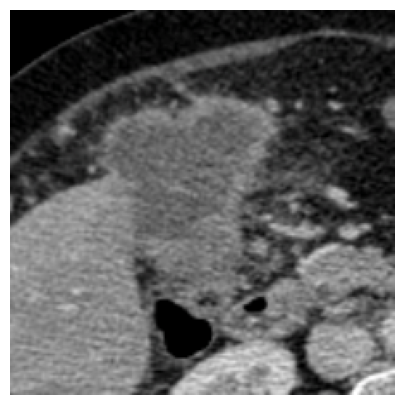

In [3]:
# load an image
# img_url = '/home/aarjav/scratch/Her2Neu_slices/imgs/case0442_slice531.png' 
# img_url = '/home/aarjav/scratch/Her2Neu_slices/imgs/case0003_slice293.png'
img_url = '/home/aarjav/scratch/Her2Neu_patches/imgs/case0024_slice515.png'
# img_url = '/home/aarjav/scratch/COVID-imagenet/train/covid/P001_IM0060.png'

# img_url = '/home/aarjav/scratch/COVID-imagenet/train/normal/normal001_IM0004.png'
# img_url = "/home/aarjav/scratch/COVID-imagenet/train/normal/normal002_IM0090.png"
# "# img_url = '/home/aarjav/scratch/BenMal_MAE/train/case00266_slice464.png'
# img_url = 'https://user-images.githubusercontent.com/11435359/147743081-0428eecf-89e5-4e07-8da5-a30fd73cc0ba.jpg' # cucumber, from ILSVRC2012_val_00047851
img = Image.open(img_url)
img = img.resize((224, 224))
img = np.array(img) / 255.

# img = np.stack([img, img, img], axis=-1)
assert img.shape == (224, 224, 3)

# normalize by ImageNet mean and std
img = img - imagenet_mean
img = img / imagenet_std

plt.rcParams['figure.figsize'] = [5, 5]
show_image(torch.tensor(img))

### Load a pre-trained MAE model

In [6]:
# This is an MAE model trained with pixels as targets for visualization (ViT-Large, training mask ratio=0.75)

# download checkpoint if not exist
# !wget -nc https://dl.fbaipublicfiles.com/mae/visualize/mae_visualize_vit_large.pth

# chkpt_dir = '/home/aarjav/scratch/mae/output_dir_glcm_patch_and_rgb/checkpoint-99.pth'
chkpt_dir_1 = '/home/aarjav/scratch/mae/output_dir__GLCM_scaled_RGB_MSssim_Her2Neu_patches/checkpoint-240.pth'
# chkpt_dir_1 = '/home/aarjav/scratch/mae/output_dir_rgb_train_covid/checkpoint-199.pth'
# chkpt_dir_1 = '/home/aarjav/scratch/mae/output_dir_rgb_train/checkpoint-199.pth'
# chkpt_dir_1 = '/home/aarjav/scratch/mae/output_dir_GLCM_benMal/checkpoint-299.pth'
chkpt_dir_2 = '/home/aarjav/scratch/mae/output_dir_glcm_L30_train/checkpoint-299.pth'
# chkpt_dir_2 = '/home/aarjav/scratch/mae/output_dir_glcm_train_covid/checkpoint-220.pth'
# chkpt_dir_3 = '/home/aarjav/scratch/mae/output_dir_glcm_covid_new/checkpoint-220.pth'
# chkpt_dir_3 = '/home/aarjav/scratch/mae/'
# chkpt_dir_3 = '/home/aarjav/scratch/mae/output_dir_glcm_ssim_her2neu/checkpoint-299.pth'
chkpt_dir_3 = '/home/aarjav/scratch/mae/output_dir_glcm_patch_4x4/checkpoint-240.pth'
# chkpt_dir_3 = '/home/aarjav/scratch/mae/output_dir_glcm_L30_train/checkpoint-240.pth'
chkpt_dir_4 = '/home/aarjav/scratch/mae/output_dir_glcm_ssim_and_rgb_her2neu/checkpoint-299.pth'
# chkpt_dir_4 = '/home/aarjav/scratch/mae/output_dir_glcm_scaled_covid/checkpoint-260.pth'
# chkpt_dir_4  = '/home/aarjav/scratch/mae/output_dir_glcm_patch_4x4/checkpoint-240.pth'
# chkpt_dir_4 = '/home/aarjav/scratch/mae/output_dir_glcm_L30_train/checkpoint-260.pth'
# chkpt_dir_5 = '/home/aarjav/scratch/mae/output_dir_glcm_patch_and_rgb/checkpoint-99.pth'
# chkpt_dir_6 = '/home/aarjav/scratch/mae/output_dir_glcm_full_and_rgb/checkpoint-99.pth'


model_mae_1 = prepare_model(chkpt_dir_1, 'mae_vit_base_patch16')
# model_mae_2 = prepare_model(chkpt_dir_2, 'mae_vit_base_patch16')
# model_mae_3 = prepare_model(chkpt_dir_3, 'mae_vit_base_patch16')
# model_mae_4 = prepare_model(chkpt_dir_4, 'mae_vit_base_patch16')
# model_mae_5 = prepare_model(chkpt_dir_5, 'mae_vit_base_patch16')
# model_mae_6 = prepare_model(chkpt_dir_6, 'mae_vit_base_patch16')

print('Model loaded.')

_IncompatibleKeys(missing_keys=[], unexpected_keys=['ssim.kernel', 'ssim.weights'])
Model loaded.


### Run MAE on the image

MAE with pixel reconstruction:


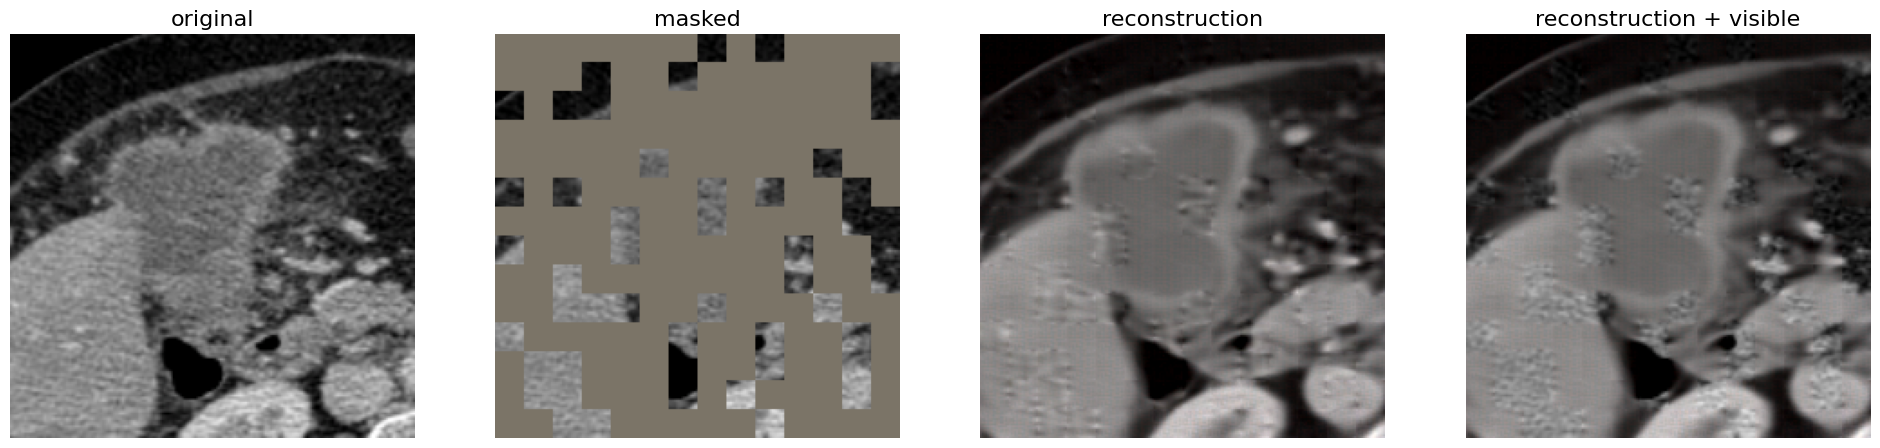

In [7]:
# make random mask reproducible (comment out to make it change)
torch.manual_seed(2)
print('MAE with pixel reconstruction:')
# run_one_image(img, model_mae_1, model_mae_2, model_mae_3, model_mae_4)
run_one_image(img, model=model_mae_1)

### Load another pre-trained MAE model

In [ ]:
# This is an MAE model trained with an extra GAN loss for more realistic generation (ViT-Large, training mask ratio=0.75)

# download checkpoint if not exist
!wget -nc https://dl.fbaipublicfiles.com/mae/visualize/mae_visualize_vit_large_ganloss.pth

chkpt_dir = 'mae_visualize_vit_large_ganloss.pth'
model_mae_gan = prepare_model('mae_visualize_vit_large_ganloss.pth', 'mae_vit_large_patch16')
print('Model loaded.')

### Run MAE on the image

In [ ]:
# make random mask reproducible (comment out to make it change)
torch.manual_seed(2)
print('MAE with extra GAN loss:') 
run_one_image(img, model_mae_gan) 

In [ ]:
# make random mask reproducible (comment out to make it change)
torch.manual_seed(2)
print('MAE with extra GAN loss:') 
run_one_image(img, model_mae_gan) 

In [17]:
import numpy as np


imgs = os.listdir('/home/aarjav/scratch/Her2Neu_slices/imgs')

# unique_cases = np.unique([img.split('_')[0] for img in imgs])


In [ ]:
print(imgs)

In [ ]:
print(unique_cases)

In [ ]:
import pandas as pd
import random

df = pd.read_csv('/home/aarjav/scratch/mae/data.csv')
df['0=negative,  2=positive'].value_counts()

In [ ]:
df_0 = df.groupby('0=negative,  2=positive')
df_0['0']

In [5]:
negative_list = np.array(df_0.get_group(0)['FLARE'])
postive_list = np.array(df_0.get_group(2)['FLARE'])

In [45]:
# random.shuffle(negative_list)
# random.shuffle(postive_list)

In [ ]:
print(negative_list)

In [55]:
train_negative = negative_list[:97]
test_negative = negative_list[97:]
train_postive = postive_list[:23]
test_positive = postive_list[23:]
# print(train_negative)
# print(len(train_negative))



In [ ]:
train_negative = np.array(train_negative)
test_negative = np.array(test_negative)
train_postive = np.array(train_postive)
test_positive = np.array(test_positive)


In [ ]:
train_total = np.concatenate([train_postive, train_negative])
test_total = np.concatenate([test_positive, test_negative])

train_total_cases = [img.split('_')[2] for img in train_total]
test_total_cases = [img.split('_')[2] for img in test_total]
print((train_total_cases))
print(test_total_cases)

In [79]:
from shutil import copy
import os

for img in imgs:
    case = img.split('_')[0].split('case')[1]
    if case in train_total_cases:
        copy(os.path.join('/home/aarjav/scratch/Her2Neu_slices/imgs', img), '/home/aarjav/scratch/Her2Neu_slices/train') 
    else :
        copy(os.path.join('/home/aarjav/scratch/Her2Neu_slices/imgs', img), '/home/aarjav/scratch/Her2Neu_slices/val/') 

In [ ]:
for img in imgs:
    print(os.path.join('home/aarjav/scratch/Her2Neu_slices/imgs', img))
    

In [ ]:
import os
img_train = os.listdir('/home/aarjav/scratch/Her2Neu_slices/train')
img_test = os.listdir('/home/aarjav/scratch/Her2Neu_slices/val')

img_train = set(img_train)
img_test = set(img_test)
print(len(img_train))
print(len(img_test))

img_train.intersection(img_test)

In [1]:
import numpy as np

train_list = ['0017', '0012', '0440', '0050', '0110', '0309', '0028', '0295', '0023', '0030', '0342', '0113', '0291', '0316', '0098', '0426', '0181', '0008', '0075', '0025', '0422', '0302', '0074', '0300', '0432', '0090', '0437', '0106', '0180', '0045', '0420', '0053', '0069', '0312', '0308', '0120', '0154', '0315', '0024', '0115', '0339', '0078', '0292', '0182', '0089', '0080', '0294', '0296', '0303', '0013', '0088', '0186', '0007', '0304', '0019', '0178', '0068', '0097', '0010', '0124', '0425', '0121', '0306', '0112', '0084', '0044', '0076', '0011', '0427', '0096', '0209', '0187', '0346', '0338', '0307', '0102', '0299', '0114', '0337', '0157', '0151', '0099', '0052', '0101', '0070', '0111', '0150', '0082', '0179', '0108', '0092', '0026', '0009', '0293', '0297', '0313', '0210', '0183', '0321', '0100', '0208', '0091', '0341', '0149', '0287', '0438', '0004', '0072', '0116', '0086', '0442', '0424', '0107', '0423', '0289', '0311', '0119', '0103', '0071', '0211']
val_list = ['0310', '0049', '0345', '0073', '0095', '0027', '0003', '0094', '0051', '0048', '0087', '0093', '0344', '0079', '0152', '0122', '0185', '0077', '0399', '0109', '0081', '0288', '0063', '0441', '0083', '0421', '0398', '0085', '0340', '0314']


In [ ]:
train_list_negative = []
train_list_positive = []

for i in negative_list:
    if i.split('_')[2] in train_list:
        train_list_negative.append(i)
    else:
        train_list_positive.append(i)


In [13]:
# train_list = set(train_list)
# negative_list = [i.split('_')[2] for i in negative_list]
# negative_list = set(negative_list)

val_list = set(val_list)
# negative_list = [i.split('_')[2] for i in negative_list]
# negative_list = set(negative_list)





In [ ]:
train_list_negative = train_list.intersection(negative_list)
print(len(train_list_negative))

In [ ]:
train_list_positive = train_list.difference(train_list_negative)
print(len(train_list_positive))

In [ ]:
val_list_negative = val_list.intersection(negative_list)
print(len(val_list_negative))

In [ ]:
val_list_positive = val_list.difference(val_list_negative)
print(len(val_list_positive))

In [18]:
from shutil import copy
import os

for img in imgs:
    case = img.split('_')[0].split('case')[1]
    if case in train_list_positive:
        copy(os.path.join('/home/aarjav/scratch/Her2Neu_slices/imgs', img), '/home/aarjav/scratch/Her2Neu_imageNet/train/mal/') 
    elif case in train_list_negative :
        copy(os.path.join('/home/aarjav/scratch/Her2Neu_slices/imgs', img), '/home/aarjav/scratch/Her2Neu_imageNet/train/benign') 
    elif case in val_list_positive :
        copy(os.path.join('/home/aarjav/scratch/Her2Neu_slices/imgs', img), '/home/aarjav/scratch/Her2Neu_imageNet/val/mal/')
    else:
        copy(os.path.join('/home/aarjav/scratch/Her2Neu_slices/imgs', img), '/home/aarjav/scratch/Her2Neu_imageNet/val/benign/')

In [ ]:
from torchvision import datasets, transforms
import os
import PIL

from torchvision import datasets, transforms

from timm.data import create_transform
from timm.data.constants import IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD

class ImageFolderWithPaths(datasets.ImageFolder):
    """Custom dataset that includes image file paths. Extends
    torchvision.datasets.ImageFolder
    """

    # override the __getitem__ method. this is the method that dataloader calls
    def __getitem__(self, index):
        # this is what ImageFolder normally returns 
        original_tuple = super(ImageFolderWithPaths, self).__getitem__(index)
        # the image file path
        path = self.imgs[index][0]
        # make a new tuple that includes original and the path
        tuple_with_path = (original_tuple + (path,))
        return tuple_with_path

def build_transform(is_train):
    mean = IMAGENET_DEFAULT_MEAN
    std = IMAGENET_DEFAULT_STD
    # train transform
    if is_train:
        # this should always dispatch to transforms_imagenet_train
        transform = create_transform(
            input_size=512,
            is_training=True,
            color_jitter=False,
            # auto_augment=.aa,
            interpolation='bicubic',
            # re_prob=args.reprob,
            # re_mode=args.remode,
            # re_count=args.recount,
            mean=mean,
            std=std,
        )
        return transform

    # eval transform
    t = []
    # if args.input_size <= 224:
    #     crop_pct = 224 / 256
    
    crop_pct = 1.0
    size = int(512 / crop_pct)
    t.append(
        transforms.Resize(size, interpolation=PIL.Image.BICUBIC),  # to maintain same ratio w.r.t. 224 images
    )
    t.append(transforms.CenterCrop(224))

    t.append(transforms.ToTensor())
    t.append(transforms.Normalize(mean, std))
    return transforms.Compose(t)


dataset = ImageFolderWithPaths("/home/aarjav/scratch/Her2Neu_imageNet/val", transform=build_transform(False))

print(dataset)


In [ ]:
dataset[0]

In [32]:
sampler = torch.utils.data.SequentialSampler(dataset)

data_loader_val = torch.utils.data.DataLoader(
        dataset, sampler=sampler,
        batch_size=16,
        drop_last=False
)

In [ ]:
# for batch in data_loader_val:
#     print(batch[2][0])
  
single_case = '/home/aarjav/scratch/Her2Neu_imageNet/val/benign/case0048_slice291.png'
x = single_case.split('/')[-1].split('_')[0].split('case')[-1]
print(x)

In [ ]:
from collections import defaultdict

d = defaultdict(int)
d['0'] += 1
d['1'] = 2

for i in d:
    print(d[i])

In [ ]:
x = 'caseFLARE22_Tr_0063_0000_slice538.png'
cases = x.split('/')[-1].split('slice')

print(cases)


In [11]:
import pandas as pd
import numpy as np

df = pd.read_csv('/home/aarjav/scratch/gbcu_data/train.txt', skipinitialspace=True)


In [ ]:
df.head()

In [13]:
df_labels = df.groupby('label')

In [ ]:
df_2 = df_labels.get_group(2)
print(df_2)

In [ ]:
df_1 = df_labels.get_group(1)
df_0 = df_labels.get_group(0)

print(df_0.shape)
print(df_1.shape)
print(df_2.shape)

In [ ]:
list_0 = np.array(df_0['img'])
list_1 = np.array(df_1['img'])
list_2 = np.array(df_2['img'])

print(list_1)

In [ ]:
from shutil import copy
import os

for img in list_0:
    copy(os.path.join('/home/aarjav/scratch/gbcu_data/imgs', img), '/home/aarjav/scratch/gbcu_imagenet/train/normal/')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# file = pd.read_csv('/home/aarjav/scratch/mae/output_dir_rgb_train/log.txt')
file = pd.read_csv('/home/aarjav/scratch/mae/output_dir_glcm_L30_train/log.txt')
print(file)


In [ ]:
loss = [float(x.split(' "train_loss": ')[1]) for x in file['b']]
epoch = np.arange(0,100,1)
print(loss)
print(epoch)

In [ ]:
plt.plot(epoch, loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('GLCM Pre-training Loss')
plt.grid()
plt.show()

In [ ]:
import cv2
from torchvision.utils import save_image

chkpt_dir_2 = '/home/aarjav/scratch/mae/output_dir_rgb_train_covid/checkpoint-199.pth'

model_1 = prepare_model(chkpt_dir_2, 'mae_vit_base_patch16')
imgs_cap = sorted(os.listdir('/home/aarjav/scratch/COVID-imagenet/train/cap'))
imgs_covid = sorted(os.listdir('/home/aarjav/scratch/COVID-imagenet/train/covid'))
imgs_normal = sorted(os.listdir('/home/aarjav/scratch/COVID-imagenet/train/normal'))


imgs_benign_path = [os.path.join('/home/aarjav/scratch/COVID-imagenet/train/cap', img) for img in imgs_cap]
imgs_mal_path = [os.path.join('/home/aarjav/scratch/COVID-imagenet/train/covid', img) for img in imgs_covid]
imgs_normal_path = [os.path.join('/home/aarjav/scratch/COVID-imagenet/train/normal', img) for img in imgs_normal]


imgs = imgs_benign_path + imgs_mal_path + imgs_normal_path


for img_path in imgs:
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = np.array(img) / 255.

    img = np.stack([img, img, img], axis=-1)
    assert img.shape == (224, 224, 3)

    # normalize by ImageNet mean and std
    img = img - imagenet_mean
    img = img / imagenet_std

    # plt.rcParams['figure.figsize'] = [5, 5]
    # show_image(torch.tensor(img))


    x = torch.tensor(img)

    # make it a batch-like
    x = x.unsqueeze(dim=0)
    x = torch.einsum('nhwc->nchw', x)

    # run MAE
    loss, y_1, mask_1 = model_1(x.float(), mask_ratio=0.75)
    y_1 = model_1.unpatchify(y_1)
    y_1 = torch.einsum('nchw->nhwc', y_1).detach().cpu()

    # images.shape #torch.Size([64,3,28,28])
    # img1 = images[0] #torch.Size([3,28,28]
    # img1 = img1.numpy() # TypeError: tensor or list of tensors expected, got <class 'numpy.ndarray'>
    print(y_1.shape)

    # y_1 = y_1.squeeze(0).detach().cpu()
    y_1 = torch.clip((y_1 * imagenet_std + imagenet_mean) * 255, 0, 255).int()
    y_1 = y_1.squeeze(0)


    # save_image(y_1, os.path.join('/home/aarjav/scratch/mae/glcm_reconstructions', img_path.split('/')[-1]))

    # y_1 = y_1.permute(2,0,1)
    y_1 = y_1.detach().cpu().numpy()
    # print(y_1.shape)
    cv2.imwrite(os.path.join('/home/aarjav/scratch/mae/rgb_reconstructions_covid_19', img_path.split('/')[-1]), y_1)

    # # visualize the mask_1
    # mask_1 = mask_1.detach()
    # mask_1 = mask_1.unsqueeze(-1).repeat(1, 1, model_1.patch_embed.patch_size[0]**2 *3)  # (N, H*W, p*p*3)
    # mask_1 = model_1.unpatchify(mask_1)  # 1 is removing, 0 is keeping
    # mask_1 = torch.einsum('nchw->nhwc', mask_1).detach().cpu()

    # x = torch.einsum('nchw->nhwc', x)

    # # masked image
    # im_masked_1 = x * (1 - mask_1)

    # # MAE reconstruction pasted with visible patches
    # im_paste_1 = x * (1 - mask_1) + y_1 * mask_1

In [ ]:
folder_0 = sorted(os.listdir('/home/aarjav/scratch/COVID-CT-MD/Normal_Cases'))
print(folder_0)

In [ ]:
from shutil import copy
import os
from PIL import Image
import pydicom
import gdcm
import libjpeg
import numpy as np

folder_0 = sorted(os.listdir('/home/aarjav/scratch/COVID-CT-MD/Normal_Cases'))
folder_0 = folder_0[1:]
print(len(folder_0))
folder_0_train = folder_0[:int(len(folder_0)*0.8)]
folder_0_test = folder_0[int(len(folder_0)*0.8):]

print(folder_0)

for folder in folder_0_train:
    list_0 = [os.path.join('/home/aarjav/scratch/COVID-CT-MD/Normal_Cases', folder, x) for x in sorted(os.listdir(os.path.join('/home/aarjav/scratch/COVID-CT-MD/Normal_Cases', folder)))]
    for img in list_0:
        dicom_data = pydicom.dcmread(img)
        print(dicom_data)
    
        # Extract the pixel data from the DICOM file
        image_data = dicom_data.pixel_array.astype(float)
        
        # Convert the pixel data to an image (using Pillow)
        scaled_image = (np.maximum(image_data, 0) / image_data.max()) * 255.0

        scaled_image = np.uint8(scaled_image)
        image = Image.fromarray(scaled_image)
        
        # Ensure the image is in 'L' mode (grayscale) and save it as PNG
        image = image.convert('L')
        
        # Construct output file path
        output_file = os.path.join('/home/aarjav/scratch/COVID-imagenet/train/normal/', folder + '_' + img.split('/')[-1]).replace('.dcm', '.png')
    

        # copy(img, os.path.join('/home/aarjav/scratch/COVID-19/train/cap_cases/', folder + img.split('/')[-1])) 
        
        image.save(output_file)

for folder in folder_0_test:
    list_0 = [os.path.join('/home/aarjav/scratch/COVID-CT-MD/Normal_Cases', folder, x) for x in sorted(os.listdir(os.path.join('/home/aarjav/scratch/COVID-CT-MD/Normal_Cases', folder)))]
    for img in list_0:
        dicom_data = pydicom.dcmread(img)
        print(dicom_data)
    
        # Extract the pixel data from the DICOM file
        image_data = dicom_data.pixel_array.astype(float)
        
        # Convert the pixel data to an image (using Pillow)
        scaled_image = (np.maximum(image_data, 0) / image_data.max()) * 255.0

        scaled_image = np.uint8(scaled_image)
        image = Image.fromarray(scaled_image)

        # image = Image.fromarray(image_data)
        
        # Ensure the image is in 'L' mode (grayscale) and save it as PNG
        image = image.convert('L')
        
        # Construct output file path
        output_file = os.path.join('/home/aarjav/scratch/COVID-imagenet/val/normal/', folder + '_' + img.split('/')[-1]).replace('.dcm', '.png')
    

        # copy(img, os.path.join('/home/aarjav/scratch/COVID-19/train/cap_cases/', folder + img.split('/')[-1])) 
        
        image.save(output_file)




In [25]:
import piqa
from piqa import SSIM

x = torch.rand(5, 3, 256, 256, requires_grad=True).cuda()
y = torch.rand(5, 3, 256, 256).cuda()

ssim = piqa.SSIM().cuda()
l = 1 - ssim(x, y, reduction = 'none')
print(ssim(x,y))
print(l)
l.backward()

TypeError: forward() got an unexpected keyword argument 'reduction'

In [26]:
class SSIMLoss(SSIM):
    def forward(self, x, y):
        return 1. - super().forward(x, y)

criterion = SSIMLoss(reduction='none').cuda() # .cuda() if you need GPU support

loss = criterion(x, y)
print(loss)

tensor([0.9950, 0.9968, 0.9922, 0.9913, 0.9904], device='cuda:0',
       grad_fn=<RsubBackward1>)


In [75]:
import torch

x = torch.rand( (8, 196, 2, 256, 256), dtype=torch.float64)
y = torch.rand( (8, 196, 2, 256, 256), dtype=torch.float64)

print(x.shape)
print(y.shape)



torch.Size([8, 196, 2, 256, 256])
torch.Size([8, 196, 2, 256, 256])


In [76]:
print(x[0,0,1,:,:].sum())

tensor(32696.9631, dtype=torch.float64)


In [77]:
x_sum = torch.sum(x, (-2, -1))
# print(x_sum)
x_sum = x_sum.unsqueeze(-1).unsqueeze(-1).repeat(1,1,1,256,256)
print(x_sum.shape)
print(x_sum[0,0,0,:,:])

torch.Size([8, 196, 2, 256, 256])
tensor([[32771.0839, 32771.0839, 32771.0839,  ..., 32771.0839, 32771.0839,
         32771.0839],
        [32771.0839, 32771.0839, 32771.0839,  ..., 32771.0839, 32771.0839,
         32771.0839],
        [32771.0839, 32771.0839, 32771.0839,  ..., 32771.0839, 32771.0839,
         32771.0839],
        ...,
        [32771.0839, 32771.0839, 32771.0839,  ..., 32771.0839, 32771.0839,
         32771.0839],
        [32771.0839, 32771.0839, 32771.0839,  ..., 32771.0839, 32771.0839,
         32771.0839],
        [32771.0839, 32771.0839, 32771.0839,  ..., 32771.0839, 32771.0839,
         32771.0839]], dtype=torch.float64)


In [82]:
# x_new = ( (x_sum - x) / x_sum)
x_sum = torch.sum(x, (-2, -1))
x_sum = x_sum.unsqueeze(-1).unsqueeze(-1).repeat(1,1,1,256,256)
x_new = x * torch.div((x_sum - x), x_sum)
print(x_new[0,0,0,:,:])

tensor([[0.0203, 0.6416, 0.7047,  ..., 0.4206, 0.0631, 0.7965],
        [0.7104, 0.1501, 0.2757,  ..., 0.2488, 0.4232, 0.7183],
        [0.4081, 0.2323, 0.6528,  ..., 0.6235, 0.4933, 0.4281],
        ...,
        [0.1877, 0.1439, 0.2495,  ..., 0.2201, 0.0150, 0.3382],
        [0.8614, 0.9131, 0.2852,  ..., 0.5201, 0.0807, 0.6248],
        [0.8878, 0.9119, 0.0897,  ..., 0.1506, 0.9171, 0.3873]],
       dtype=torch.float64)


In [79]:
x_test = x_sum - x
print(x_test[0,0,0,:,:])

tensor([[32771.0636, 32770.4423, 32770.3793,  ..., 32770.6633, 32771.0208,
         32770.2874],
        [32770.3736, 32770.9338, 32770.8083,  ..., 32770.8351, 32770.6607,
         32770.3656],
        [32770.6758, 32770.8516, 32770.4311,  ..., 32770.4604, 32770.5907,
         32770.6558],
        ...,
        [32770.8963, 32770.9400, 32770.8344,  ..., 32770.8638, 32771.0690,
         32770.7457],
        [32770.2225, 32770.1708, 32770.7987,  ..., 32770.5639, 32771.0032,
         32770.4591],
        [32770.1961, 32770.1720, 32770.9942,  ..., 32770.9333, 32770.1669,
         32770.6966]], dtype=torch.float64)


In [80]:
32771.0636 / 32771.0839

0.9999993805514624

In [2]:
from skimage.feature import graycomatrix, graycoprops

In [2]:
import torch

a = torch.tensor([1])
b = a
b = b/2

print(a)
print(b)

tensor([1])
tensor([0.5000])


In [2]:
import os
import numpy as np

def get_image_paths_from_dir(fdir):
    flist = os.listdir(fdir)
    flist.sort()
    image_paths = []
    for i in range(0, len(flist)):
        fpath = os.path.join(fdir, flist[i])
        if os.path.isdir(fpath):
            image_paths.extend(get_image_paths_from_dir(fpath))
        else:
            image_paths.append(fpath)
    return image_paths


her2neu_patches = sorted(os.listdir('/home/aarjav/scratch/Her2Neu_patches/imgs'))
her2neu_images = get_image_paths_from_dir('/home/aarjav/scratch/Her2Neu_imageNet')

print(len(her2neu_images))
print(len(her2neu_patches))
print(her2neu_images == her2neu_patches)

6882
9117
False


In [4]:
her2neu_images = [case.split('/')[-1] for case in her2neu_images]
her2neu_patches = [case.split('/')[-1] for case in her2neu_patches]
her2neu_images = set(her2neu_images)
her2neu_patches = set(her2neu_patches)

x = her2neu_images.intersection(her2neu_patches)
print(len(x))

6869


In [5]:
print(x)

{'case0097_slice331.png', 'case0049_slice220.png', 'case0292_slice276.png', 'case0088_slice102.png', 'case0295_slice045.png', 'case0007_slice337.png', 'case0208_slice306.png', 'case0316_slice292.png', 'case0311_slice140.png', 'case0295_slice038.png', 'case0081_slice473.png', 'case0294_slice516.png', 'case0051_slice416.png', 'case0291_slice656.png', 'case0010_slice177.png', 'case0178_slice359.png', 'case0025_slice395.png', 'case0077_slice308.png', 'case0024_slice519.png', 'case0208_slice271.png', 'case0211_slice245.png', 'case0154_slice292.png', 'case0111_slice441.png', 'case0095_slice329.png', 'case0086_slice395.png', 'case0183_slice407.png', 'case0309_slice570.png', 'case0152_slice331.png', 'case0346_slice119.png', 'case0051_slice402.png', 'case0096_slice291.png', 'case0109_slice325.png', 'case0443_slice337.png', 'case0150_slice105.png', 'case0157_slice349.png', 'case0208_slice332.png', 'case0440_slice267.png', 'case0294_slice640.png', 'case0106_slice322.png', 'case0321_slice552.png',

In [6]:
train_benign_her2neu = sorted(os.listdir('/home/aarjav/scratch/Her2Neu_imageNet/train/benign'))
train_mal_her2neu = sorted(os.listdir('/home/aarjav/scratch/Her2Neu_imageNet/train/mal'))
val_benign_her2neu = sorted(os.listdir('/home/aarjav/scratch/Her2Neu_imageNet/val/benign'))
val_mal_her2neu = sorted(os.listdir('/home/aarjav/scratch/Her2Neu_imageNet/val/mal'))

print(len(train_benign_her2neu))
print(len(train_mal_her2neu))
print(len(val_benign_her2neu))
print(len(val_mal_her2neu))

4113
1312
1140
317


In [16]:
x = np.unique([case.split('/')[-1].split('_')[0] for case in her2neu_patches])
print(len(x))

192


In [8]:
from shutil import copy
import os

for img in x:
    if(img in train_benign_her2neu):
        copy(os.path.join('/home/aarjav/scratch/Her2Neu_patches/imgs', img), '/home/aarjav/scratch/Her2Neu_patches_imageNet/train/benign')
    elif(img in train_mal_her2neu):
        copy(os.path.join('/home/aarjav/scratch/Her2Neu_patches/imgs', img), '/home/aarjav/scratch/Her2Neu_patches_imageNet/train/mal')
    elif(img in val_mal_her2neu):
        copy(os.path.join('/home/aarjav/scratch/Her2Neu_patches/imgs', img), '/home/aarjav/scratch/Her2Neu_patches_imageNet/val/mal')
    else:
        copy(os.path.join('/home/aarjav/scratch/Her2Neu_patches/imgs', img), '/home/aarjav/scratch/Her2Neu_patches_imageNet/val/benign')




In [9]:
x = get_image_paths_from_dir('/home/aarjav/scratch/Her2Neu_patches_imageNet')
print(len(x))

6869


In [34]:
import pandas as pd
import numpy as np

df_train = pd.read_csv('/home/chetan_madan/scratch/mae_aarjav/data/gbcu/train.txt',header=None).dropna(axis=1, how="all")
df_test = pd.read_csv('/home/chetan_madan/scratch/mae_aarjav/data/gbcu/test.txt',header=None).dropna(axis=1, how="all")

print(df_train.shape)
print(df_test.shape)

(1133, 2)
(122, 2)


In [35]:
df_train.to_csv('/home/aarjav/scratch/mae/gbcu_folds/train_0.csv', index = False)
df_test.to_csv('/home/aarjav/scratch/mae/gbcu_folds/test_0.csv', index = False)


In [23]:
df_test.tail()

,0,1
117,im00435.jpg,0
118,im01148.jpg,0
119,im00482.jpg,0
120,im00387.jpg,0
121,im00523.jpg,0


In [21]:
train_list = np.array(df_train)
test_list = np.array(df_test)
train_list = np.append(train_list, test_list, axis=0)
print(train_list.shape)

print(train_list[0:122].shape)

(1255, 2)
(122, 2)


In [22]:
train_list[-1]

array(['im00523.jpg', 0], dtype=object)

In [27]:
train_1 = train_list[122:]
test_1 = train_list[:122]

train_2 = np.append(train_list[0:122] , train_list[244:], axis=0)
test_2 = train_list[122:244]

train_3 = np.append(train_list[0:244] , train_list[366:], axis=0)
test_3 = train_list[244:366]

train_4 = np.append(train_list[0:366] , train_list[488:], axis=0)
test_4 = train_list[366:488]

print(train_1.shape)
print(train_2.shape)
print(train_3.shape)
print(train_4.shape)

print(test_1.shape)
print(test_2.shape)
print(test_3.shape)
print(test_4.shape)



(1133, 2)
(1133, 2)
(1133, 2)
(1133, 2)
(122, 2)
(122, 2)
(122, 2)
(122, 2)


In [28]:
t_s_1 = set(train_1[:,])
t_s_2 = set(train_2)
t_s_3 = set(train_3)
t_s_4 = set(train_4)

print(t_s_1.intersection(t_s_2))

TypeError: unhashable type: 'numpy.ndarray'

In [32]:
df_1 = pd.DataFrame(train_1, columns=None) 
df_2 = pd.DataFrame(train_2, columns=None) 
df_3 = pd.DataFrame(train_3, columns=None) 
df_4 = pd.DataFrame(train_4, columns=None) 
df_5 = pd.DataFrame(test_1, columns=None) 
df_6 = pd.DataFrame(test_2, columns=None) 
df_7 = pd.DataFrame(test_3, columns=None) 
df_8 = pd.DataFrame(test_4, columns=None) 


print(df_1)

                0  1
0     im00645.jpg  1
1     im00174.jpg  1
2     im00855.jpg  1
3     im00272.jpg  1
4     im01220.jpg  0
...           ... ..
1128  im00435.jpg  0
1129  im01148.jpg  0
1130  im00482.jpg  0
1131  im00387.jpg  0
1132  im00523.jpg  0

[1133 rows x 2 columns]


In [33]:
df_1.to_csv('/home/aarjav/scratch/mae/gbcu_folds/train_1.csv', index = False)
df_2.to_csv('/home/aarjav/scratch/mae/gbcu_folds/train_2.csv', index = False)
df_3.to_csv('/home/aarjav/scratch/mae/gbcu_folds/train_3.csv', index = False)
df_4.to_csv('/home/aarjav/scratch/mae/gbcu_folds/train_4.csv', index = False)
df_5.to_csv('/home/aarjav/scratch/mae/gbcu_folds/test_1.csv', index = False)
df_6.to_csv('/home/aarjav/scratch/mae/gbcu_folds/test_2.csv', index = False)
df_7.to_csv('/home/aarjav/scratch/mae/gbcu_folds/test_3.csv', index = False)
df_8.to_csv('/home/aarjav/scratch/mae/gbcu_folds/test_4.csv', index = False)




In [32]:
import pandas as pd
import numpy as np

df_test = pd.read_csv('/home/chetan_madan/scratch/ViT-Adapter/detection/data/GBCU/gbcu_splits/test_4',header=None).dropna(axis=1, how="all")
df_train = pd.read_csv('/home/chetan_madan/scratch/ViT-Adapter/detection/data/GBCU/gbcu_splits/train_4',header=None).dropna(axis=1, how="all")

# print(df_train[0])
train_np = set(np.array(df_train[0]))
test_np = set(np.array(df_test[0]))

print(train_np.intersection(test_np))

# print(train_np)

set()


In [33]:
df_train

,0,1
0,2G100254-K1FAIGHG.jpg,1
1,vandana_IMG-0001-00001.jpg,1
2,raghu_thesis_phool_devi_IMG-0001-00002.jpg,0
3,ram_vishal_IMG-0001-00001.jpg,1
4,IMG-0004-00018.jpg,2
...,...,...
1044,raghu_thesis_gyasu_ram_IMG-0001-00001.jpg,0
1045,raghu_thesis_abhinandan_IMG-0001-00001.jpg,0
1046,GR085556-JCJ92398.jpg,0
1047,IMG-0001-00004.jpg,2


In [34]:
df_train_group = df_train.groupby(1)
df_test_group = df_test.groupby(1)

df_train_group

In [35]:
df_train_group.get_group(0)

,0,1
2,raghu_thesis_phool_devi_IMG-0001-00002.jpg,0
15,raghu_thesis_champa_IMG-0001-00041.jpg,0
16,GB083642-JCK8NT92.jpg,0
22,raghu_thesis_harjinder_IMG-0001-00029.jpg,0
30,GN082100-JC58KMGU.jpg,0
...,...,...
1041,raghu_thesis_abhinandan_IMG-0001-00006.jpg,0
1044,raghu_thesis_gyasu_ram_IMG-0001-00001.jpg,0
1045,raghu_thesis_abhinandan_IMG-0001-00001.jpg,0
1046,GR085556-JCJ92398.jpg,0


In [36]:
from shutil import copy
import os


df_train = df_train_group.get_group(0)
df_val = df_test_group.get_group(0)

train_list = np.array(df_train[0])
val_list = np.array(df_val[0])

for img in train_list:
    print(img)
    # try:
    copy(os.path.join('/home/chetan_madan/scratch/ViT-Adapter/detection/data/GBCU/imgs', img), '/home/aarjav/scratch/gbcu_folds/gbcu_fold_4/train/normal')
    # except IOError as io_err:
    #     os.makedirs("/home/aarjav/scratch/gbcu_folds/gbcu_fold_4/train/normal")
    #     copy(os.path.join('/home/chetan_madan/scratch/ViT-Adapter/detection/data/GBCU/imgs', img), '/home/aarjav/scratch/gbcu_folds/gbcu_fold_4/train/normal')

for img in val_list:
    # try:
    copy(os.path.join('/home/chetan_madan/scratch/ViT-Adapter/detection/data/GBCU/imgs', img), '/home/aarjav/scratch/gbcu_folds/gbcu_fold_4/val/normal')
    # except IOError as io_err:
    #     os.makedirs("/home/aarjav/scratch/gbcu_folds/gbcu_fold_4/val/normal")
    #     copy(os.path.join('/home/chetan_madan/scratch/ViT-Adapter/detection/data/GBCU/imgs', img), '/home/aarjav/scratch/gbcu_folds/gbcu_fold_4/val/normal')


df_train = df_train_group.get_group(1)
df_val = df_test_group.get_group(1)

train_list = np.array(df_train[0])
val_list = np.array(df_val[0])

for img in train_list:
    # try:
    copy(os.path.join('/home/chetan_madan/scratch/ViT-Adapter/detection/data/GBCU/imgs', img), '/home/aarjav/scratch/gbcu_folds/gbcu_fold_4/train/benign')
    # except IOError as io_err:
    #     os.makedirs("/home/aarjav/scratch/gbcu_folds/gbcu_fold_4/train/benign")
    #     copy(os.path.join('/home/chetan_madan/scratch/ViT-Adapter/detection/data/GBCU/imgs', img), '/home/aarjav/scratch/gbcu_folds/gbcu_fold_4/train/benign')

for img in val_list:
    # try:
    copy(os.path.join('/home/chetan_madan/scratch/ViT-Adapter/detection/data/GBCU/imgs', img), '/home/aarjav/scratch/gbcu_folds/gbcu_fold_4/val/benign')
    # except IOError as io_err:
    #     os.makedirs("/home/aarjav/scratch/gbcu_folds/gbcu_fold_4/val/benign")
    #     copy(os.path.join('/home/chetan_madan/scratch/ViT-Adapter/detection/data/GBCU/imgs', img), '/home/aarjav/scratch/gbcu_folds/gbcu_fold_4/val/benign')

df_train = df_train_group.get_group(2)
df_val = df_test_group.get_group(2)

train_list = np.array(df_train[0])
val_list = np.array(df_val[0])


for img in train_list:
    # try:
    copy(os.path.join('/home/chetan_madan/scratch/ViT-Adapter/detection/data/GBCU/imgs', img), '/home/aarjav/scratch/gbcu_folds/gbcu_fold_4/train/mal')
    # except IOError as io_err:
    #     os.makedirs("/home/aarjav/scratch/gbcu_folds/gbcu_fold_4/train/mal")
    #     copy(os.path.join('/home/chetan_madan/scratch/ViT-Adapter/detection/data/GBCU/imgs', img), '/home/aarjav/scratch/gbcu_folds/gbcu_fold_4/train/mal')

for img in val_list:
    # try:
    copy(os.path.join('/home/chetan_madan/scratch/ViT-Adapter/detection/data/GBCU/imgs', img), '/home/aarjav/scratch/gbcu_folds/gbcu_fold_4/val/mal')
    # except IOError as io_err:
    #     os.makedirs("/home/aarjav/scratch/gbcu_folds/gbcu_fold_4/val/mal")
    #     copy(os.path.join('/home/aarjav/scratcimgs', img), '/home/aarjav/scratch/gbcu_folds/gbcu_fold_0/val/mal')



    
    
    

raghu_thesis_phool_devi_IMG-0001-00002.jpg
raghu_thesis_champa_IMG-0001-00041.jpg
GB083642-JCK8NT92.jpg
raghu_thesis_harjinder_IMG-0001-00029.jpg
GN082100-JC58KMGU.jpg
_G101523-K1EB0HB6.jpg
control_group_1_IMG-0001-00014.jpg
raghu_thesis_pooja_soni_IMG-0001-00001.jpg
GR093433-JCAA7NP2.jpg
2G084109-JCJ8KU08.jpg
raghu_thesis_lal_babu_IMG-0001-00002.jpg
raghu_thesis_harjinder_IMG-0001-00043.jpg
raghu_thesis_champa_IMG-0001-00044.jpg
control_group_1_IMG-0001-00015.jpg
raghu_thesis_lal_babu_IMG-0001-00016.jpg
raghu_thesis_harjinder_IMG-0001-00039.jpg
_G101523-K1EB0HB2.jpg
GR093433-JCAA7NOQ.jpg
sarla_IMG-0001-00019.jpg
raghu_thesis_control_suman_IMG-0001-00020.jpg
raghu_thesis_champa_IMG-0001-00004.jpg
raghu_thesis_control_suman_IMG-0001-00019.jpg
raghu_thesis_champa_IMG-0001-00052.jpg
control_group_1_IMG-0001-00003.jpg
reena_IMG-0001-00019.jpg
raghu_thesis_harjinder_IMG-0001-00028.jpg
raghu_thesis_harjinder_IMG-0001-00049.jpg
raghu_thesis_harjinder_IMG-0001-00050.jpg
raghu_thesis_harjinder_

In [9]:
df_1 = pd.read_csv('/home/chetan_madan/scratch/ViT-Adapter/detection/data/GBCU/gbcu_splits/train_0')
df_2 = pd.read_csv('/home/chetan_madan/scratch/ViT-Adapter/detection/data/GBCU/gbcu_splits/test_0')

In [10]:
print(df_1.shape)
print(df_2.shape)

(880, 2)
(373, 2)


In [11]:
880 + 373

1253

In [2]:
a = ['IMG', 'abc']
x = ''.join(a[:-1])
print(x)

IMG


In [1]:
import os
import numpy as np

# x = os.listdir('/home/aarjav/scratch/busi_dataset/Dataset_BUSI_with_GT/benign')

In [32]:
def get_image_paths_from_dir(fdir):
    flist = os.listdir(fdir)
    flist.sort()
    image_paths = []
    for i in range(0, len(flist)):
        fpath = os.path.join(fdir, flist[i])
        if os.path.isdir(fpath):
            image_paths.extend(get_image_paths_from_dir(fpath))
        else:
            image_paths.append(fpath)
    return image_paths

In [18]:
gbcu_path_benign_train = get_image_paths_from_dir('/home/aarjav/scratch/v01_scratch3/gbcu_folds/gbcu_fold_0/train/benign')
gbcu_path_benign_val = get_image_paths_from_dir('/home/aarjav/scratch/v01_scratch3/gbcu_folds/gbcu_fold_0/val/benign')

gbcu_path_mal_train = get_image_paths_from_dir('/home/aarjav/scratch/v01_scratch3/gbcu_folds/gbcu_fold_0/train/mal')
gbcu_path_mal_val = get_image_paths_from_dir('/home/aarjav/scratch/v01_scratch3/gbcu_folds/gbcu_fold_0/val/mal')

gbcu_path_normal_train = get_image_paths_from_dir('/home/aarjav/scratch/v01_scratch3/gbcu_folds/gbcu_fold_0/train/normal')
gbcu_path_normal_val = get_image_paths_from_dir('/home/aarjav/scratch/v01_scratch3/gbcu_folds/gbcu_fold_0/val/normal')

gbcu_path_benign = gbcu_path_benign_train + gbcu_path_benign_val
gbcu_path_mal = gbcu_path_mal_train + gbcu_path_mal_val
gbcu_path_normal = gbcu_path_normal_train + gbcu_path_normal_val

gbcu_path_benign_x = [''.join(single_case.split('/')[-1].split('-')[:-1]) for single_case in gbcu_path_benign]
gbcu_path_mal_x = [''.join(single_case.split('/')[-1].split('-')[:-1]) for single_case in gbcu_path_mal]
gbcu_path_normal_x = [''.join(single_case.split('/')[-1].split('-')[:-1]) for single_case in gbcu_path_normal]

gbcu_path_benign_x = np.unique(gbcu_path_benign_x)
gbcu_path_mal_x = np.unique(gbcu_path_mal_x)
gbcu_path_normal_x = np.unique(gbcu_path_normal_x)

In [21]:
# gbcu_path_benign_x = set(gbcu_path_benign_x)
# gbcu_path_mal_x = set(gbcu_path_mal_x)
# gbcu_path_normal_x = set(gbcu_path_normal_x)

gbcu_path_benign_x.intersection(gbcu_path_mal_x)

{'2G083750',
 '2G083908',
 '2G090950',
 '2G095043',
 '2G105328',
 'CL105107',
 'GB131012',
 'GN085211',
 'IMG0007',
 'IMG0010',
 'IMG0015',
 'IMG0017',
 'IMG0023',
 'IMG0027',
 'PC090543',
 'raghu_thesis_durgi_devi_IMG0001'}

In [20]:
print(len(gbcu_path_benign_x))
print(len(gbcu_path_mal_x))
print(len(gbcu_path_normal_x))

print(len(gbcu_path_normal + gbcu_path_mal + gbcu_path_benign))

116
47
109
1255


In [6]:
cases = [''.join(single_case.split('/')[-1].split('-')[:-1]) for single_case in gbcu_paths]
cases = np.unique(cases)
print(len(cases))
print(cases)

218
['2G082511' '2G083750' '2G083908' '2G084109' '2G085155' '2G085248'
 '2G090950' '2G091238' '2G094555' '2G095043' '2G100254' '2G100706'
 '2G101703' '2G101858' '2G105328' '2G131625' '2G134205' '2G134919'
 '2G135442' '2G143835' '2J092513' '2S090309' 'BG112238' 'CL105107'
 'FG111103' 'GA081149' 'GA111314' 'GB083642' 'GB090426' 'GB131012'
 'GC092146' 'GD083018' 'GD090646' 'GG082729' 'GG082909' 'GG084141'
 'GG091954' 'GG103355' 'GG121515' 'GH081647' 'GH085845' 'GH090947'
 'GH121958' 'GJ140837' 'GK084205' 'GK090740' 'GK092540' 'GK095142'
 'GK102850' 'GK112008' 'GM084540' 'GM090035' 'GM092058' 'GN081204'
 'GN082100' 'GN084729' 'GN085211' 'GN090226' 'GN091024' 'GP074459'
 'GP084150' 'GP085411' 'GR081116' 'GR084451' 'GR085556' 'GR092251'
 'GR093433' 'GR102727' 'GR103334' 'GR134511' 'GS081501' 'GS083703'
 'GS083726' 'GS084344' 'GS084805' 'GS085613' 'GS092344' 'GS093827'
 'GS094004' 'GS103637' 'GV083842' 'GV101706' 'GV102455' 'IMG0001'
 'IMG0002' 'IMG0004' 'IMG0005' 'IMG0006' 'IMG0007' 'IMG0009

In [1]:
import pandas as pd
import numpy as np

df_train = pd.read_csv('/home/aarjav/scratch/v01_scratch4/GBCU/gbcu_splits/train_0',header=None).dropna(axis=1, how="all")
df_test = pd.read_csv('/home/aarjav/scratch/v01_scratch4/GBCU/gbcu_splits/test_0',header=None).dropna(axis=1, how="all")

print(df_train.shape)
print(df_test.shape)

(881, 2)
(374, 2)


In [15]:
df_train

,0,1
0,GN081204-JCK8I7GG.jpg,1
1,2J092513-K189HLPU.jpg,1
2,raksha_devi_IMG-0001-00020.jpg,1
3,GK095142-JCNAMM9E.jpg,1
4,raghu_thesis_paramjit_IMG-0001-00002.jpg,0
...,...,...
876,2G083750-K1I8J0GO.jpg,2
877,CL105107-JCSBTIGK.jpg,1
878,_M091221-JCC97TO0.jpg,0
879,2G101858-K1NACIPC.jpg,2


In [19]:
total_tuple = np.append(np.array(df_train), np.array(df_test), axis=0)
print(total_tuple)
print(len(total_tuple))

[['GN081204-JCK8I7GG.jpg' 1]
 ['2J092513-K189HLPU.jpg' 1]
 ['raksha_devi_IMG-0001-00020.jpg' 1]
 ...
 ['raghu_thesis_champa_IMG-0001-00042.jpg' 0]
 ['2G090950-K1KETD8I.jpg' 1]
 ['2S090309-K1899JH4.jpg' 2]]
1255


In [4]:
train_list = np.array(df_train[0])
val_list = np.array(df_test[0])

total = np.append(train_list, val_list)
print(len(total))

total_x = [''.join(single_case.split('/')[-1].split('-')[:-1]) for single_case in total]
total_u = np.unique(total_x)
print(len(total_u))

1255
218


In [5]:
total_u_r = np.random.permutation(total_u)
print(len(total_u_r))

218


In [ ]:
train_2 = np.append(train_list[0*21:1*21] , train_list[2*21:], axis=0)
test_2 = train_list[1*21:2*21]

train_3 = np.append(train_list[0:244] , train_list[366:], axis=0)
test_3 = train_list[244:366]

train_4 = np.append(train_list[0:366] , train_list[488:], axis=0)
test_4 = train_list[366:488]

print(train_1.shape)
print(train_2.shape)
print(train_3.shape)
print(train_4.shape)

print(test_1.shape)
print(test_2.shape)
print(test_3.shape)
print(test_4.shape)




In [12]:
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
# x = kf.split(X)
folds = kf.get_n_splits(total_u_r)

In [27]:
import os
# os.getcwd()
os.chdir('/home/aarjav/scratch/v01_scratch4/')
os.getcwd()


'/nvme/scratch/aarjav/v01_scratch4'

In [30]:
from shutil import copy

for i, (train_index, test_index) in enumerate(kf.split(total_u_r)):
    print(f"Fold {i}:")
    os.mkdir(f'/home/aarjav/scratch/v01_scratch4/gbcu10fold/gbcu_fold_{i}')
    os.mkdir(f'/home/aarjav/scratch/v01_scratch4/gbcu10fold/gbcu_fold_{i}/train')
    os.mkdir(f'/home/aarjav/scratch/v01_scratch4/gbcu10fold/gbcu_fold_{i}/train/ben')
    os.mkdir(f'/home/aarjav/scratch/v01_scratch4/gbcu10fold/gbcu_fold_{i}/train/mal')
    os.mkdir(f'/home/aarjav/scratch/v01_scratch4/gbcu10fold/gbcu_fold_{i}/train/nor')
    os.mkdir(f'/home/aarjav/scratch/v01_scratch4/gbcu10fold/gbcu_fold_{i}/val')
    os.mkdir(f'/home/aarjav/scratch/v01_scratch4/gbcu10fold/gbcu_fold_{i}/val/ben')
    os.mkdir(f'/home/aarjav/scratch/v01_scratch4/gbcu10fold/gbcu_fold_{i}/val/mal')
    os.mkdir(f'/home/aarjav/scratch/v01_scratch4/gbcu10fold/gbcu_fold_{i}/val/nor')

    for j in range(len(total_tuple)):
        case = ''.join(total_tuple[j][0].split('/')[-1].split('-')[:-1])
        for k in train_index:
            if total_u_r[k] == case:
                if total_tuple[j][1] == 0:
                    copy(os.path.join('/home/aarjav/scratch/v01_scratch4/GBCU/imgs', total_tuple[j][0]), f'/home/aarjav/scratch/v01_scratch4/gbcu10fold/gbcu_fold_{i}/train/nor')
                elif total_tuple[j][1] == 1:
                    copy(os.path.join('/home/aarjav/scratch/v01_scratch4/GBCU/imgs', total_tuple[j][0]), f'/home/aarjav/scratch/v01_scratch4/gbcu10fold/gbcu_fold_{i}/train/ben')
                else:
                    copy(os.path.join('/home/aarjav/scratch/v01_scratch4/GBCU/imgs', total_tuple[j][0]), f'/home/aarjav/scratch/v01_scratch4/gbcu10fold/gbcu_fold_{i}/train/mal')
        for k in test_index:
            if total_u_r[k] == case:
                if total_tuple[j][1] == 0:
                    copy(os.path.join('/home/aarjav/scratch/v01_scratch4/GBCU/imgs', total_tuple[j][0]), f'/home/aarjav/scratch/v01_scratch4/gbcu10fold/gbcu_fold_{i}/val/nor')
                elif total_tuple[j][1] == 1:
                    copy(os.path.join('/home/aarjav/scratch/v01_scratch4/GBCU/imgs', total_tuple[j][0]), f'/home/aarjav/scratch/v01_scratch4/gbcu10fold/gbcu_fold_{i}/val/ben')
                else:
                    copy(os.path.join('/home/aarjav/scratch/v01_scratch4/GBCU/imgs', total_tuple[j][0]), f'/home/aarjav/scratch/v01_scratch4/gbcu10fold/gbcu_fold_{i}/val/mal')

                
                
                

Fold 0:
Fold 1:
Fold 2:
Fold 3:
Fold 4:
Fold 5:
Fold 6:
Fold 7:
Fold 8:
Fold 9:


In [33]:
x = get_image_paths_from_dir('/home/aarjav/scratch/v01_scratch4/gbcu10fold/gbcu_fold_0/train')
x = [case.split('/')[-1] for case in x]

y = get_image_paths_from_dir('/home/aarjav/scratch/v01_scratch4/gbcu10fold/gbcu_fold_0/val')
y = [case.split('/')[-1] for case in y]

print(x)

['2G083750-K1I8J0H4.jpg', '2G083908-K1L8PK06.jpg', '2G083908-K1L8PK08.jpg', '2G083908-K1L8PK0C.jpg', '2G083908-K1L8PK0E.jpg', '2G083908-K1L8PK0G.jpg', '2G083908-K1L8PK0I.jpg', '2G083908-K1L8PK0K.jpg', '2G083908-K1L8PK0M.jpg', '2G083908-K1LBNMAC.jpg', '2G083908-K1LBNMAE.jpg', '2G083908-K1LBNMAG.jpg', '2G083908-K1LBNMAI.jpg', '2G083908-K1LBNMAK.jpg', '2G084109-JCJ8KU04.jpg', '2G084109-JCJ8KU0A.jpg', '2G084109-JCJ8KU0C.jpg', '2G084109-JCJ8KU0E.jpg', '2G084109-JCJ8KU0G.jpg', '2G084109-JCJ8KU0K.jpg', '2G085155-K1L8T0OQ.jpg', '2G085155-K1L8T0OS.jpg', '2G085155-K1L8T0OU.jpg', '2G085155-K1L8T0P0.jpg', '2G085248-K1E95B0I.jpg', '2G085248-K1E95B0K.jpg', '2G085248-K1E95B0M.jpg', '2G085248-K1E95B0O.jpg', '2G085248-K1E95B0Q.jpg', '2G085248-K1E95B0S.jpg', '2G085248-K1E95B0U.jpg', '2G085248-K1E95B10.jpg', '2G085248-K1E95B12.jpg', '2G085248-K1E95B14.jpg', '2G085248-K1E95B16.jpg', '2G085248-K1E95B1A.jpg', '2G090950-K1KETD80.jpg', '2G090950-K1KETD8E.jpg', '2G090950-K1KETD8G.jpg', '2G090950-K1KETD8I.jpg',

In [34]:
x = set(x)
y = set(y)
x.intersection(y)

set()

In [6]:
import os
import numpy as np

def get_image_paths_from_dir(fdir):
    flist = os.listdir(fdir)
    flist.sort()
    image_paths = []
    for i in range(0, len(flist)):
        fpath = os.path.join(fdir, flist[i])
        if os.path.isdir(fpath):
            image_paths.extend(get_image_paths_from_dir(fpath))
        else:
            image_paths.append(fpath)
    return image_paths

In [3]:
train = get_image_paths_from_dir('/home/aarjav/scratch/v01_scratch4/gbcu10fold/gbcu_fold_0/train')
val = get_image_paths_from_dir('/home/aarjav/scratch/v01_scratch4/gbcu10fold/gbcu_fold_0/val')

print(len(train) + len(val))

1255


In [5]:
train_case = [case.split('/')[-1] for case in train]
val_case = [case.split('/')[-1] for case in val]

train_case = set(train_case)
val_case = set(val_case)

train_case.intersection(val_case)





set()

In [8]:
path_a = get_image_paths_from_dir('/home/aarjav/scratch/v01_scratch4/busi_imagenet/test/ben')
path_b = get_image_paths_from_dir('/home/aarjav/scratch/v01_scratch4/busi_imagenet/train/ben')
path_c = get_image_paths_from_dir('/home/aarjav/scratch/v01_scratch4/busi_imagenet/val/ben')

path_benign = path_a + path_b + path_c

path_a = get_image_paths_from_dir('/home/aarjav/scratch/v01_scratch4/busi_imagenet/test/mal')
path_b = get_image_paths_from_dir('/home/aarjav/scratch/v01_scratch4/busi_imagenet/train/mal')
path_c = get_image_paths_from_dir('/home/aarjav/scratch/v01_scratch4/busi_imagenet/val/mal')

path_mal = path_a + path_b + path_c

path_a = get_image_paths_from_dir('/home/aarjav/scratch/v01_scratch4/busi_imagenet/test/nor')
path_b = get_image_paths_from_dir('/home/aarjav/scratch/v01_scratch4/busi_imagenet/train/nor')
path_c = get_image_paths_from_dir('/home/aarjav/scratch/v01_scratch4/busi_imagenet/val/nor')

path_nor = path_a + path_b + path_c


In [9]:
import pandas as pd
import numpy as np
df_train = pd.read_csv(f'/home/aarjav/scratch/busi_final/cv-5/train_0.txt',header=None).dropna(axis=1, how="all")
print(df_train)
numpy = list(df_train.itertuples(index=False, name=None))
# numpy = np.array(df_train)
print(numpy[0][1])


                     0  1
0       benign_185.png  1
1    malignant_119.png  2
2     malignant_64.png  2
3       benign_258.png  1
4        normal_37.png  0
..                 ... ..
619  malignant_188.png  2
620   malignant_19.png  2
621     benign_351.png  1
622     benign_421.png  1
623  malignant_169.png  2

[624 rows x 2 columns]
1


In [10]:
# import numpy as np
# from sklearn.model_selection import KFold
import os
import pandas as pd
import numpy as np
from shutil import copy

os.mkdir(f'/home/aarjav/scratch/busi5fold')

for i in range(5):
    print(f"Fold {i}:")
    os.mkdir(f'/home/aarjav/scratch/busi5fold/fold_{i}')
    os.mkdir(f'/home/aarjav/scratch/busi5fold/fold_{i}/train')
    os.mkdir(f'/home/aarjav/scratch/busi5fold/fold_{i}/train/ben')
    os.mkdir(f'/home/aarjav/scratch/busi5fold/fold_{i}/train/mal')
    os.mkdir(f'/home/aarjav/scratch/busi5fold/fold_{i}/train/nor')
    os.mkdir(f'/home/aarjav/scratch/busi5fold/fold_{i}/val')
    os.mkdir(f'/home/aarjav/scratch/busi5fold/fold_{i}/val/ben')
    os.mkdir(f'/home/aarjav/scratch/busi5fold/fold_{i}/val/mal')
    os.mkdir(f'/home/aarjav/scratch/busi5fold/fold_{i}/val/nor')
    
    df_train = pd.read_csv(f'/home/aarjav/scratch/busi_final/cv-5/train_{i}.txt',header=None).dropna(axis=1, how="all")
    df_test = pd.read_csv(f'/home/aarjav/scratch/busi_final/cv-5/val_{i}.txt',header=None).dropna(axis=1, how="all")
    
    train = list(df_train.itertuples(index=False, name=None))
    test = list(df_test.itertuples(index=False, name=None))


    for j in range(len(train)):
        if train[j][1] == 0:
            copy(os.path.join('/home/aarjav/scratch/busi_final/imgs/images', train[j][0]), f'/home/aarjav/scratch/busi5fold/fold_{i}/train/nor')
        elif train[j][1] == 1:
            copy(os.path.join('/home/aarjav/scratch/busi_final/imgs/images', train[j][0]), f'/home/aarjav/scratch/busi5fold/fold_{i}/train/ben')
        else:
            copy(os.path.join('/home/aarjav/scratch/busi_final/imgs/images', train[j][0]), f'/home/aarjav/scratch/busi5fold/fold_{i}/train/mal')
            
    for j in range(len(test)):
        if test[j][1] == 0:
            copy(os.path.join('/home/aarjav/scratch/busi_final/imgs/images', test[j][0]), f'/home/aarjav/scratch/busi5fold/fold_{i}/val/nor')
        elif test[j][1] == 1:
            copy(os.path.join('/home/aarjav/scratch/busi_final/imgs/images', test[j][0]), f'/home/aarjav/scratch/busi5fold/fold_{i}/val/ben')
        else:
            copy(os.path.join('/home/aarjav/scratch/busi_final/imgs/images', test[j][0]), f'/home/aarjav/scratch/busi5fold/fold_{i}/val/mal')

                
                
                

Fold 0:
Fold 1:
Fold 2:
Fold 3:
Fold 4:


In [21]:
i = 4

os.mkdir(f'/home/aarjav/scratch/v01_scratch4/busi5fold/fold_{i}')
os.mkdir(f'/home/aarjav/scratch/v01_scratch4/busi5fold/fold_{i}/train')
os.mkdir(f'/home/aarjav/scratch/v01_scratch4/busi5fold/fold_{i}/train/ben')
os.mkdir(f'/home/aarjav/scratch/v01_scratch4/busi5fold/fold_{i}/train/mal')
os.mkdir(f'/home/aarjav/scratch/v01_scratch4/busi5fold/fold_{i}/train/nor')
os.mkdir(f'/home/aarjav/scratch/v01_scratch4/busi5fold/fold_{i}/val')
os.mkdir(f'/home/aarjav/scratch/v01_scratch4/busi5fold/fold_{i}/val/ben')
os.mkdir(f'/home/aarjav/scratch/v01_scratch4/busi5fold/fold_{i}/val/mal')
os.mkdir(f'/home/aarjav/scratch/v01_scratch4/busi5fold/fold_{i}/val/nor')

In [16]:
benign_train_0 = path_benign[:int(0.8*len(path_benign))]
benign_train_1 = path_benign[:int(0.6*len(path_benign))] + path_benign[int(0.8*len(path_benign)):]
benign_train_2 = path_benign[:int(0.4*len(path_benign))] + path_benign[int(0.6*len(path_benign)):]
benign_train_3 = path_benign[:int(0.2*len(path_benign))] + path_benign[int(0.4*len(path_benign)):]
benign_train_4 = path_benign[int(0.2*len(path_benign)):]

benign_test_0 = path_benign[int(0.8*len(path_benign)):]
benign_test_1 = path_benign[int(0.6*len(path_benign)):int(0.8*len(path_benign))]
benign_test_2 = path_benign[int(0.4*len(path_benign)):int(0.6*len(path_benign))]
benign_test_3 = path_benign[int(0.2*len(path_benign)):int(0.4*len(path_benign))]
benign_test_4 = path_benign[:int(0.2*len(path_benign))]

mal_train_0 = path_mal[:int(0.8*len(path_mal))]
mal_train_1 = path_mal[:int(0.6*len(path_mal))] + path_mal[int(0.8*len(path_mal)):]
mal_train_2 = path_mal[:int(0.4*len(path_mal))] + path_mal[int(0.6*len(path_mal)):]
mal_train_3 = path_mal[:int(0.2*len(path_mal))] + path_mal[int(0.4*len(path_mal)):]
mal_train_4 = path_mal[int(0.2*len(path_mal)):]

mal_test_0 = path_mal[int(0.8*len(path_mal)):]
mal_test_1 = path_mal[int(0.6*len(path_mal)):int(0.8*len(path_mal))]
mal_test_2 = path_mal[int(0.4*len(path_mal)):int(0.6*len(path_mal))]
mal_test_3 = path_mal[int(0.2*len(path_mal)):int(0.4*len(path_mal))]
mal_test_4 = path_mal[:int(0.2*len(path_mal))]

nor_train_0 = path_nor[:int(0.8*len(path_nor))]
nor_train_1 = path_nor[:int(0.6*len(path_nor))] + path_nor[int(0.8*len(path_nor)):]
nor_train_2 = path_nor[:int(0.4*len(path_nor))] + path_nor[int(0.6*len(path_nor)):]
nor_train_3 = path_nor[:int(0.2*len(path_nor))] + path_nor[int(0.4*len(path_nor)):]
nor_train_4 = path_nor[int(0.2*len(path_nor)):]

nor_test_0 = path_nor[int(0.8*len(path_nor)):]
nor_test_1 = path_nor[int(0.6*len(path_nor)):int(0.8*len(path_nor))]
nor_test_2 = path_nor[int(0.4*len(path_nor)):int(0.6*len(path_nor))]
nor_test_3 = path_nor[int(0.2*len(path_nor)):int(0.4*len(path_nor))]
nor_test_4 = path_nor[:int(0.2*len(path_nor))]

In [25]:
from shutil import copy
x = 4

for i in benign_train_4:
    copy(i, f'/home/aarjav/scratch/v01_scratch4/busi5fold/fold_{x}/train/ben')
for i in benign_test_4:
    copy(i, f'/home/aarjav/scratch/v01_scratch4/busi5fold/fold_{x}/val/ben')

for i in mal_train_4:
    copy(i, f'/home/aarjav/scratch/v01_scratch4/busi5fold/fold_{x}/train/mal')
for i in mal_test_4:
    copy(i, f'/home/aarjav/scratch/v01_scratch4/busi5fold/fold_{x}/val/mal')
    
for i in nor_train_4:
    copy(i, f'/home/aarjav/scratch/v01_scratch4/busi5fold/fold_{x}/train/nor')
for i in nor_test_4:
    copy(i, f'/home/aarjav/scratch/v01_scratch4/busi5fold/fold_{x}/val/nor')



In [26]:
train = get_image_paths_from_dir('/home/aarjav/scratch/v01_scratch4/busi5fold/fold_0/train')
val = get_image_paths_from_dir('/home/aarjav/scratch/v01_scratch4/busi5fold/fold_0/val')

print(len(train) + len(val))

train = set(train)
val = set(val)

print(train.intersection(val))

780
set()


In [1]:
import os
import numpy as np

def get_image_paths_from_dir(fdir):
    flist = os.listdir(fdir)
    flist.sort()
    image_paths = []
    for i in range(0, len(flist)):
        fpath = os.path.join(fdir, flist[i])
        if os.path.isdir(fpath):
            image_paths.extend(get_image_paths_from_dir(fpath))
        else:
            image_paths.append(fpath)
    return image_paths

In [36]:
X = ['mal', 'nor', 'ben']

for x in X:
    l = get_image_paths_from_dir(f'/home/aarjav/scratch/v01_scratch4/busi5fold/fold_0/val/{x}')
    l = [x.split('/')[-1] for x in l]
    if x =='mal':
        l = [s + ',2' for s in l]
    elif x == 'nor':
        l = [s + ',0' for s in l]
    else:
        l = [s + ',1' for s in l]
    print(l)

    with open('/home/aarjav/scratch/v01_scratch4/busi5fold/splits/val_0.txt', 'a') as f:
        
        # write elements of list
        for items in l:
            f.write('%s\n' %items)
        
        print("File written successfully")


    # close the file
    f.close()    

['malignant (42).png,2', 'malignant (43).png,2', 'malignant (44).png,2', 'malignant (45).png,2', 'malignant (46).png,2', 'malignant (47).png,2', 'malignant (48).png,2', 'malignant (49).png,2', 'malignant (5).png,2', 'malignant (50).png,2', 'malignant (51).png,2', 'malignant (52).png,2', 'malignant (53).png,2', 'malignant (54).png,2', 'malignant (55).png,2', 'malignant (56).png,2', 'malignant (57).png,2', 'malignant (58).png,2', 'malignant (59).png,2', 'malignant (6).png,2', 'malignant (60).png,2', 'malignant (61).png,2', 'malignant (62).png,2', 'malignant (63).png,2', 'malignant (64).png,2', 'malignant (65).png,2', 'malignant (66).png,2', 'malignant (67).png,2', 'malignant (68).png,2', 'malignant (69).png,2', 'malignant (7).png,2', 'malignant (70).png,2', 'malignant (71).png,2', 'malignant (72).png,2', 'malignant (73).png,2', 'malignant (74).png,2', 'malignant (75).png,2', 'malignant (76).png,2', 'malignant (77).png,2', 'malignant (78).png,2', 'malignant (79).png,2', 'malignant (8).png

File written successfully
